In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv("Advertising.csv")
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
data.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [ ]:
data.drop(['Unnamed: 0'], axis=1)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


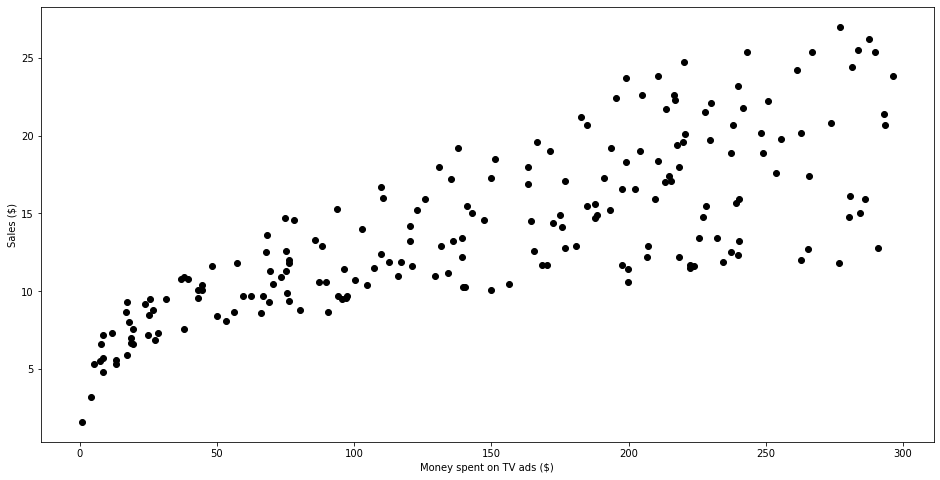

In [ ]:
plt.figure(figsize=(16, 8))
plt.scatter(
 data['TV'],
 data['sales'],
 c='black'
)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

In [ ]:
X = data['TV'].values.reshape(-1,1)
y = data['sales'].values.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print("Slope: ",reg.coef_[0][0])
print("Intercept: ",reg.intercept_[0])
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

Slope:  0.04869185798761538
Intercept:  6.847228350849376
The linear model is: Y = 6.8472 + 0.048692X


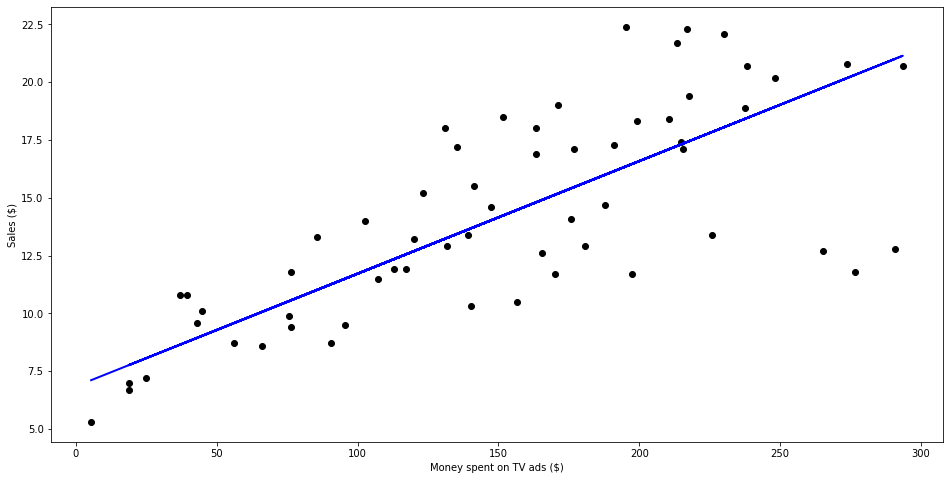

In [ ]:
predictions = reg.predict(x_test)
plt.figure(figsize=(16, 8))
plt.scatter(
 x_test,
 y_test,
 c='black'
)
plt.plot(
 x_test,
 predictions,
 c='blue',
 linewidth=2
)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test,predictions))
print("Root Mean Squared Error = ",rmse)

Root Mean Squared Error =  3.004788875479485


In [ ]:
r2 = r2_score(y_test,predictions)
print("R2 = ",r2)

R2 =  0.5340196560700988
